In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect(r'C:\Users\sylla\Desktop\database.sqlite')

In [3]:
pokemon = pd.read_sql('SELECT * FROM pokemon', conn)

In [4]:
trainers = pd.read_sql('SELECT * FROM trainers', conn)

In [5]:
print(pokemon.head(10))

   trainerID  place   pokename  pokelevel   type1   type2   hp  maxhp  attack  \
0          0      0   Smeargle         60  Normal    None  157    157      50   
1          1      0   Smeargle         30  Normal    None   83     83      27   
2          2      0    Wailord         57   Water    None  281    281     128   
3          2      1  Vileplume         57   Grass  Poison  173    173     116   
4          3      0    Armaldo         47    Rock     Bug  144    144     139   
5          3      1    Cradily         47    Rock   Grass  154    154      98   
6          4      0    Armaldo         56    Rock     Bug  170    170     165   
7          4      1    Cradily         56    Rock   Grass  182    182     115   
8          5      0   Carvanha         21   Water    Dark   57     57      50   
9          5      1      Numel         21    Fire  Ground   63     63      37   

   defense  spatk  spdef  speed  
0       68     50     80    116  
1       36     27     42     60  
2     

In [6]:
print(trainers.head())

   trainerID           trainername
0          0   A-list Actor Alonso
1          1  A-list Actor Ricardo
2          2  Ace Duo Elina & Sean
3          3   Ace Duo Jude & Rory
4          4   Ace Duo Jude & Rory


### 1.How many trainers and Pokémon are there in total?

In [7]:
pokemon.nunique()

trainerID    11443
place            6
pokename       656
pokelevel       78
type1           18
type2           19
hp             328
maxhp          328
attack         238
defense        250
spatk          222
spdef          233
speed          220
dtype: int64

In [8]:
pokemon.groupby('trainerID').size()

trainerID
0        1
1        1
2        2
3        2
4        2
        ..
11854    6
11855    6
11856    6
11858    5
11859    6
Length: 11443, dtype: int64

In [9]:
trainers.nunique()

trainerID      11860
trainername     4347
dtype: int64

In [10]:
pokemon.groupby('pokename').size()

pokename
Abomasnow      10
Abra           43
Absol          48
Accelgor        6
Aerodactyl     33
             ... 
Zekrom          1
Zigzagoon      90
Zoroark         4
Zubat         113
Zweilous        1
Length: 656, dtype: int64

### Interpretation
There are 11860 trainers in total, where 11443 trainers are with pokemons. <br>
Pokemon data shows there are 656 pokemons in the game.


### 2. What is the mean pokelevel of all the Pokémon? Show the distribution

In [11]:
pokemon.describe()

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000


In [12]:
pokemon['pokelevel'].describe()

count    28804.000000
mean        40.442508
std         18.236740
min          2.000000
25%         28.000000
50%         40.000000
75%         50.000000
max        100.000000
Name: pokelevel, dtype: float64

C:\Users\sylla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


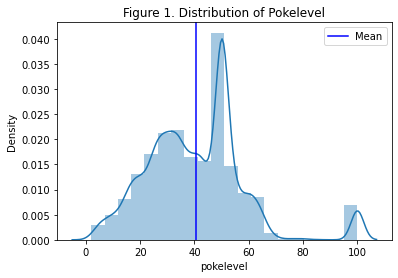

In [71]:
sns.distplot(pokemon['pokelevel'], kde=True, bins=20, hist=True).set(title='Figure 1. Distribution of Pokelevel')
plt.axvline(x=pokemon['pokelevel'].mean(), color='blue', label='Mean')
plt.legend()
plt.show()

### Interpretation
The mean of pokelevel of all the pokemon is 40.442508 and the ditribution of pokelevel is shown in the Figure 1 with the mean in a blue line.

### 3. What is the max maxhp of all the Pokémon? Show the distribution. What type of distribution is it?

In [14]:
pokemon['maxhp'].describe()

count    28804.000000
mean       120.074712
std         59.720906
min         14.000000
25%         77.000000
50%        116.000000
75%        150.000000
max        656.000000
Name: maxhp, dtype: float64

C:\Users\sylla\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


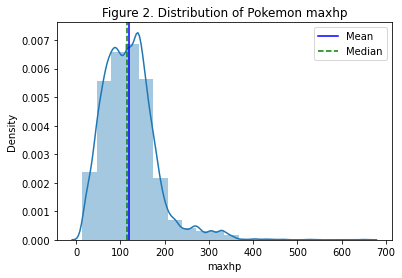

In [15]:
sns.distplot(pokemon['maxhp'], kde=True, bins=20, hist=True).set(title='Figure 2. Distribution of Pokemon maxhp')
plt.axvline(x=pokemon['maxhp'].mean(), color='blue', label="Mean")
plt.axvline(x=pokemon['maxhp'].median(), color='green', linestyle='--', label="Median")
plt.legend()
plt.show()

### Interpretation
The highest maxhp of all the pokemon is 656. Its distribution is positive-skewed because the mean is greater than median (120 > 116), shown in the Figure 2.

### 4. Show the distribution of Pokémon type1. What is the most common type1? What is the least common?

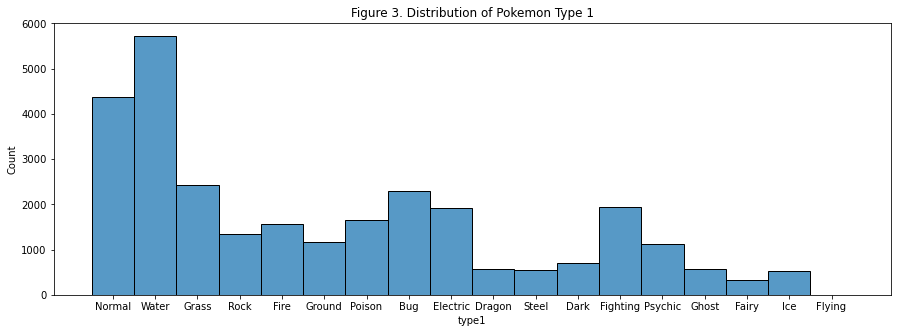

In [75]:
plt.figure(figsize=(15,5))
sns.histplot(data=pokemon['type1']).set(title='Figure 3. Distribution of Pokemon Type 1')
plt.show()

In [17]:
pokemon['type1'].value_counts()

Water       5723
Normal      4368
Grass       2420
Bug         2292
Fighting    1945
Electric    1927
Poison      1658
Fire        1574
Rock        1350
Ground      1162
Psychic     1127
Dark         714
Dragon       581
Ghost        569
Steel        547
Ice          516
Fairy        328
Flying         3
Name: type1, dtype: int64

### Interpretation
Figure 3 shows the distribution of pokemon type 1. <br>
The most common type1 is Water and the least common time is Flying.

### 5. Which Pokémon type1 has the highest average attack? What is the value? Which Pokémon type1 has the lowest average attack? What is the value? 

In [18]:
pokemon.groupby('type1')['attack'].mean().sort_values(ascending=False)

type1
Dragon      116.414802
Dark        100.726891
Steel        99.886654
Ground       98.958692
Fighting     96.572237
Flying       95.666667
Rock         93.189630
Ice          88.794574
Fire         88.202668
Poison       79.785887
Grass        77.782645
Normal       76.571886
Water        75.094706
Fairy        71.173780
Ghost        70.978910
Bug          70.067190
Electric     68.549559
Psychic      64.123336
Name: attack, dtype: float64

### Interpretation
Dragon has the highest average attack with the attack value of 116.414802 and Psychic has the lowest average attack with the attack value of 64.123336.

### 6. Which Pokémon type1 has the highest average defense? What is the value? Which Pokémon type1 has the lowest average defense? What is the value? 


In [19]:
pokemon.groupby('type1')['defense'].mean().sort_values(ascending=False)

type1
Steel       138.605119
Rock        106.042963
Flying      106.000000
Dragon      100.950086
Ground       98.033563
Ice          86.441860
Dark         78.605042
Poison       76.736429
Fire         75.781449
Water        75.006989
Fairy        74.073171
Ghost        72.961336
Grass        71.216529
Fighting     71.207198
Electric     68.431240
Psychic      66.881100
Bug          66.422339
Normal       64.786859
Name: defense, dtype: float64

### Interpretation
Steel has the highest average defense with the defense value of 138.605119 and Normal has the lowest average defense with the defense value of 64.786859.

### 7. How many trainers have a full team (6 Pokémon)? 


In [20]:
fullteam = pokemon.groupby('trainerID')['pokename'].nunique().reset_index()
fullteam = fullteam[fullteam['pokename'] == 6]
fullteam

,trainerID,pokename
1258,1258,6
1259,1259,6
1260,1260,6
1261,1261,6
1262,1262,6
...,...,...
11437,11853,6
11438,11854,6
11439,11855,6
11440,11856,6


In [21]:
fullteam.rename(columns={'pokename':'pokemon_cnt'}, inplace=True)
fullteam

,trainerID,pokemon_cnt
1258,1258,6
1259,1259,6
1260,1260,6
1261,1261,6
1262,1262,6
...,...,...
11437,11853,6
11438,11854,6
11439,11855,6
11440,11856,6


In [22]:
fullteam.shape

(964, 2)

### Interpretation
There are 964 trainers with a full team of 6 pokemons.

### 8. How many different teams does Youngster Wyatt have? What Pokémon has the highest speed on any of his teams?


In [23]:
merge = pokemon.merge(trainers, how='left', on='trainerID')
merge

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,trainername
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116,A-list Actor Alonso
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60,A-list Actor Ricardo
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93,Ace Duo Elina & Sean
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82,Ace Duo Elina & Sean
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64,Ace Duo Jude & Rory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28799,11859,1,Skiploom,50,Grass,Flying,133,133,68,73,68,88,103,Youthful Couple River
28800,11859,2,Sealeo,50,Ice,Water,168,168,83,93,98,93,68,Youthful Couple River
28801,11859,3,Lombre,50,Water,Grass,138,138,73,73,83,93,73,Youthful Couple River
28802,11859,4,Poliwhirl,50,Water,None,143,143,88,88,73,73,113,Youthful Couple River


In [24]:
data = merge[merge['trainername']=='Youngster Wyatt']
data

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,trainername
28769,11853,0,Ivysaur,51,Grass,Poison,140,140,86,87,104,104,84,Youngster Wyatt
28770,11853,1,Skiploom,51,Grass,Flying,135,135,69,74,69,89,104,Youngster Wyatt
28771,11853,2,Pidgeotto,51,Normal,Flying,143,143,84,79,74,74,95,Youngster Wyatt
28772,11853,3,Nidorina,51,Poison,None,150,150,86,91,79,79,80,Youngster Wyatt
28773,11853,4,Ditto,51,Normal,None,128,128,72,72,72,72,72,Youngster Wyatt
28774,11853,5,Heracross,51,Bug,Fighting,160,160,150,99,64,120,110,Youngster Wyatt
28775,11854,0,Granbull,51,Fairy,None,171,171,145,99,84,84,69,Youngster Wyatt
28776,11854,1,Ariados,50,Bug,Poison,148,148,113,93,83,83,63,Youngster Wyatt
28777,11854,2,Kingler,54,Water,None,142,142,164,148,78,78,105,Youngster Wyatt
28778,11854,3,Ditto,51,Normal,None,128,128,72,72,72,72,72,Youngster Wyatt


In [25]:
data.groupby('trainerID').size()

trainerID
11853    6
11854    6
11855    6
11856    6
dtype: int64

In [26]:
data.sort_values('speed',ascending=False).head(1)

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,trainername
28792,11856,5,Tauros,52,Normal,None,158,158,127,122,65,96,138,Youngster Wyatt


### Interpretation
Youngster Wyatt has 6 different teams. <br>
Tauros has the highest speed among all his pokemon at all the teams.

### 9. Which trainer has the most Dragon type Pokémon of level 100? How many level 100 Dragon type Pokémon do they have?


We assume that pokemon has a Dragon type if type 1 is Dragon because the type1 is dominant feature and type2 is the second feature.

In [58]:
df = pokemon[(pokemon['pokelevel']==100) & (pokemon['type1']=='Dragon')]
df

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
2860,1264,4,Dragonair,100,Dragon,None,268,268,209,171,181,181,181
2883,1268,3,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201
2889,1269,3,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201
3095,1312,2,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231
3096,1312,3,Salamence,100,Dragon,Flying,336,336,311,201,261,201,241
3098,1312,5,Altaria,100,Dragon,Flying,296,296,181,221,181,251,201
5290,2259,0,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201
7301,3043,1,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231
7451,3080,0,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231
9933,4090,4,Dragonair,100,Dragon,None,268,268,209,171,181,181,181


In [59]:
trainer_maxdragon = df.groupby('trainerID')['pokename'].size().sort_values(ascending=False)
trainer_maxdragon = trainer_maxdragon.reset_index()[:2].rename(columns={'pokename':'pokemon_cnt'})
trainer_maxdragon

,trainerID,pokemon_cnt
0,4138,3
1,8043,3


In [60]:
trainer_maxdragon.merge(trainers, how='left', on='trainerID')

,trainerID,pokemon_cnt,trainername
0,4138,3,Cooltrainer♂ Forgon
1,8043,3,Myth Trainer Infin


Trainer 4138 (Cooltrainer♂ Forgon) and Trainer 8043 (Myth Trainer Infin) have the most Dragon type pokemons. Each of them has 3 Dragon type pokemons and 6 in total.

### 10. Determine 3 other interesting facts/statistics about the data and explain why you think they’re interesting.

### 10.1 Of the pokelevel 100, which combination of type1 and type2 can bring the dragon type pokemon with the highest attack level?

In [30]:
pokemon_dragon = pokemon[(pokemon['type1']=='Dragon')&(pokemon['pokelevel']==100)]
pokemon_dragon

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
2860,1264,4,Dragonair,100,Dragon,None,268,268,209,171,181,181,181
2883,1268,3,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201
2889,1269,3,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201
3095,1312,2,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231
3096,1312,3,Salamence,100,Dragon,Flying,336,336,311,201,261,201,241
3098,1312,5,Altaria,100,Dragon,Flying,296,296,181,221,181,251,201
5290,2259,0,Dragonite,100,Dragon,Flying,328,328,309,231,241,241,201
7301,3043,1,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231
7451,3080,0,Rayquaza,100,Dragon,Flying,356,356,341,221,341,221,231
9933,4090,4,Dragonair,100,Dragon,None,268,268,209,171,181,181,181


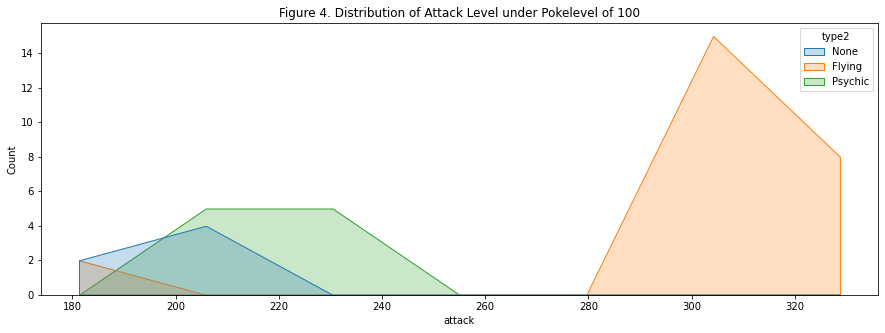

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(data=pokemon_dragon, x='attack', hue='type2', element='poly').set(title='Figure 4. Distribution of Attack Level under Pokelevel of 100')
plt.show()

### Why this question?
Since we already know the dragon type pokemon brings the highest average attack level, we also would like to know which combination of type1 and type2 can bring the max attack level of dragon pokemon under the max pokelevel because everyone likes the strongest pokemon.
<br>
### Intrepretation:
The figure shows the strongest dragon pokemon also has the second feature of flying.

##### 10.2 Of the pokelevel 100, which combination of type1 and type2 can bring the Psychic type pokemon with the highest attack level?

In [62]:
pokemon_psychic = pokemon[(pokemon['type1']=='Psychic')&(pokemon['pokelevel']==100)]
pokemon_psychic

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
2902,1271,4,Alakazam,100,Psychic,None,256,256,141,131,311,231,281
2904,1272,0,Mew,100,Psychic,None,346,346,241,241,241,241,241
2910,1273,0,Mew,100,Psychic,None,346,346,241,241,241,241,241
2953,1280,1,Hypno,100,Psychic,None,316,316,187,181,187,271,175
2958,1281,0,Hypno,100,Psychic,None,316,316,187,181,187,271,175
2962,1281,4,Espeon,100,Psychic,None,276,276,171,161,301,231,261
2975,1284,0,Mew,100,Psychic,None,346,346,241,241,241,241,241
2981,1285,0,Celebi,100,Psychic,Grass,346,346,241,241,241,241,241
3142,1320,1,Alakazam,100,Psychic,None,256,256,141,131,311,231,281
3144,1320,3,Espeon,100,Psychic,None,276,276,171,161,301,231,261


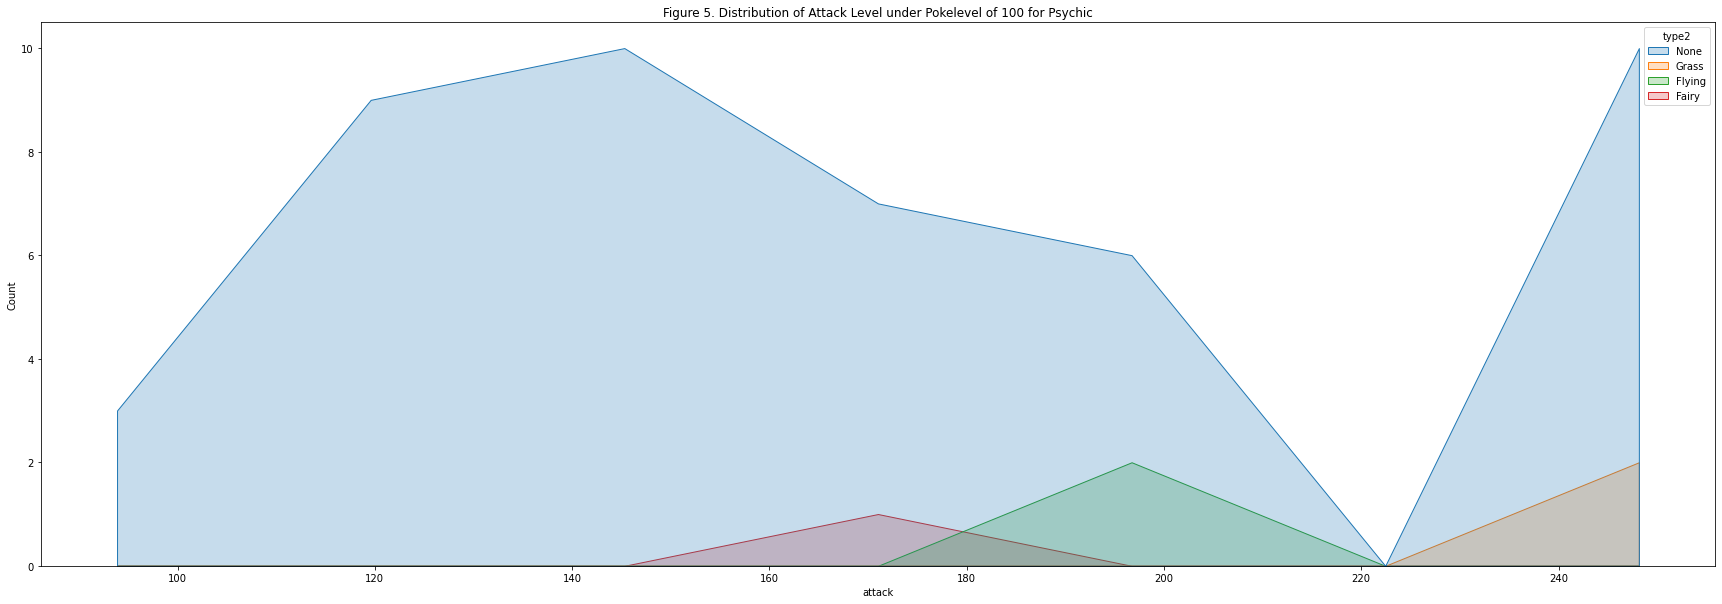

In [68]:
plt.figure(figsize=(30,10))
sns.histplot(data=pokemon_psychic, x='attack', hue='type2', element='poly').set(title='Figure 5. Distribution of Attack Level under Pokelevel of 100 for Psychic')
plt.show()

### Why this question?
Since we already know the Psychic pokemon brings the lowest average attack level, we would like to know which Psychic pokemon that can have a relatively high attack level under the max pokelevel.
<br>
### Intrepretation:
Figure shows the Psychic pokemon without the second feature and with the second feature of Grass have the max attack level.

### 10.3 Who has the most pokemon? Please show how many pokemon they have under different type1?

In [44]:
pokemon

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28799,11859,1,Skiploom,50,Grass,Flying,133,133,68,73,68,88,103
28800,11859,2,Sealeo,50,Ice,Water,168,168,83,93,98,93,68
28801,11859,3,Lombre,50,Water,Grass,138,138,73,73,83,93,73
28802,11859,4,Poliwhirl,50,Water,None,143,143,88,88,73,73,113


In [46]:
a = pokemon.merge(trainers, how='left', on='trainerID')
a

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,trainername
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116,A-list Actor Alonso
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60,A-list Actor Ricardo
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93,Ace Duo Elina & Sean
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82,Ace Duo Elina & Sean
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64,Ace Duo Jude & Rory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28799,11859,1,Skiploom,50,Grass,Flying,133,133,68,73,68,88,103,Youthful Couple River
28800,11859,2,Sealeo,50,Ice,Water,168,168,83,93,98,93,68,Youthful Couple River
28801,11859,3,Lombre,50,Water,Grass,138,138,73,73,83,93,73,Youthful Couple River
28802,11859,4,Poliwhirl,50,Water,None,143,143,88,88,73,73,113,Youthful Couple River


In [53]:
a['trainername'].value_counts()

Cooltrainer♀ Brooke       210
Cooltrainer♂ Wilton       210
Biker                     200
Beauty                    184
Bug Catcher               128
                         ... 
Skier Jill                  1
Psychic♂ Nicholas           1
Pokémon Ranger♂ RalphB      1
Lady Naomi                  1
Psychic Tōru*               1
Name: trainername, Length: 4290, dtype: int64

In [57]:
a[a['trainername']=='Cooltrainer♀ Brooke']

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,trainername
126,57,0,Wingull,18,Water,Flying,48,48,22,22,31,22,42,Cooltrainer♀ Brooke
127,57,1,Numel,18,Fire,Ground,56,56,33,25,34,27,24,Cooltrainer♀ Brooke
128,57,2,Roselia,18,Grass,Poison,52,52,33,27,47,40,34,Cooltrainer♀ Brooke
129,58,0,Wingull,26,Water,Flying,66,66,29,29,42,29,58,Cooltrainer♀ Brooke
130,58,1,Numel,26,Fire,Ground,76,76,45,35,48,37,32,Cooltrainer♀ Brooke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953,3668,1,Numel,32,Fire,Ground,91,91,54,42,58,45,38,Cooltrainer♀ Brooke
8954,3668,2,Roselia,32,Grass,Poison,85,85,54,45,80,67,58,Cooltrainer♀ Brooke
8955,3669,0,Pelipper,34,Water,Flying,97,97,51,85,75,64,61,Cooltrainer♀ Brooke
8956,3669,1,Camerupt,34,Fire,Ground,103,103,85,64,88,68,44,Cooltrainer♀ Brooke


In [55]:
a[a['trainername']=='Cooltrainer♀ Brooke'].groupby('type1').size()

type1
Fire     70
Grass    70
Water    70
dtype: int64

In [56]:
a[a['trainername']=='Cooltrainer♂ Wilton'].groupby('type1').size()

type1
Electric    70
Fighting    70
Water       70
dtype: int64

### Why this question?
Like holding a Gunnies World Record, it is interesting to look into the data about who has the most pokemons and how these pokemons look like.
<br>
### Intrepretation:
Cooltrainer♀ Brooke and Cooltrainer♂ Wilton has the most pokemons, 210 in total per person. <br>
Cooltrainer♂ Brooke has 70 Fire types, 70 Grass types and 70 Water types, and Cooltrainer♂ Wilton has 70 Electric types, 70 Fighting types and 70 Water types.